TUGAS PERTEMUAN 5

NAMA : NUR AQILA APRILLIA 

NIM : H071201088

PRODI : SISTEM INFORMASI

DATA INTEGRATION

Integrasi data adalah proses menggabungkan atau mengkombinasikan dua atau lebih set data yang berasal dari sumber yang berbeda ke dalam suatu penyimpanan seperti data warehouse. Salah satu manfaat yang didapatkan dengan melakukan integrasi data adalah terhindar dari duplikat data. jika terdapat duplikat data maka akan mengganggu proses selanjutnya yang hendak dilakukan seperti analisis data karena nilai yang diperoleh bisa tidak konsisten

Pengurangan dimensi adalah proses pengurangan jumlah variabel atau atribut acak yang sedang dipertimbangkan. Reduksi data berdimensi tinggi, sebagai bagian dari langkah pra-pemrosesan data, sangat penting dalam banyak aplikasi dunia nyata. Pengurangan dimensi tinggi telah muncul sebagai salah satu tugas penting dalam aplikasi data mining. Misalnya, Anda mungkin memiliki kumpulan data dengan ratusan fitur (kolom di database Anda). Kemudian reduksi dimensionalitas adalah Anda mengurangi fitur atribut data tersebut dengan menggabungkan atau menggabungkannya sedemikian rupa sehingga tidak akan kehilangan banyak karakteristik signifikan dari dataset asli. Salah satu masalah utama yang terjadi dengan data berdimensi tinggi secara luas dikenal sebagai "Curse of Dimensionality". Ini mendorong kami untuk mengurangi dimensi data kami jika kami ingin menggunakannya untuk analisis

### PREPROCESSING

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Real estate.csv")

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df = df.drop(['X1 transaction date','X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],axis=1)

df = df.fillna(df.mean())
df.head(20)

,No,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
0,1,32.0,84.87882,37.9
1,2,19.5,306.59470,42.2
2,3,13.3,561.98450,47.3
3,4,13.3,561.98450,54.8
4,5,5.0,390.56840,43.1
5,6,7.1,2175.03000,32.1
6,7,34.5,623.47310,40.3
7,8,20.3,287.60250,46.7
8,9,31.7,5512.03800,18.8
9,10,17.9,1783.18000,22.1


In [ ]:
df.isnull().sum()

No                                        0
X2 house age                              0
X3 distance to the nearest MRT station    0
Y house price of unit area                0
dtype: int64

In [ ]:
df["Y house price of unit area"].value_counts()

42.0    4
37.5    4
42.3    4
31.3    4
40.3    4
       ..
20.8    1
18.6    1
47.4    1
57.1    1
50.5    1
Name: Y house price of unit area, Length: 270, dtype: int64

In [ ]:
X = df.drop("Y house price of unit area",1)   #Feature Matrix
y = df["Y house price of unit area"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns)

      No  X2 house age  X3 distance to the nearest MRT station
0      1          32.0                                84.87882
1      2          19.5                               306.59470
2      3          13.3                               561.98450
3      4          13.3                               561.98450
4      5           5.0                               390.56840
..   ...           ...                                     ...
409  410          13.7                              4082.01500
410  411           5.6                                90.45606
411  412          18.8                               390.96960
412  413           8.1                               104.81010
413  414           6.5                                90.45606

[414 rows x 3 columns]


In [ ]:
df.describe()

,No,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,37.980193
std,119.655756,11.392485,1262.109595,13.606488
min,1.000000,0.000000,23.382840,7.600000
25%,104.250000,9.025000,289.324800,27.700000
50%,207.500000,16.100000,492.231300,38.450000
75%,310.750000,28.150000,1454.279000,46.600000
max,414.000000,43.800000,6488.021000,117.500000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,No,X2 house age,X3 distance to the nearest MRT station
0,0.000000,0.730594,0.009513
1,0.002421,0.445205,0.043809
2,0.004843,0.303653,0.083315
3,0.007264,0.303653,0.083315
4,0.009685,0.114155,0.056799


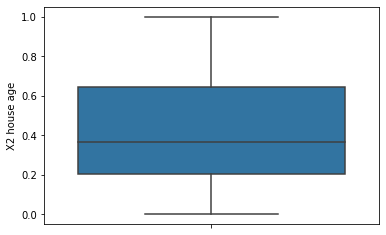

In [ ]:
import seaborn as sns
sns.boxplot(y=df['X2 house age'])

In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

,No,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
0,0.000000,0.730594,0.009513,37.9
1,0.002421,0.445205,0.043809,42.2
2,0.004843,0.303653,0.083315,47.3
3,0.007264,0.303653,0.083315,54.8
4,0.009685,0.114155,0.056799,43.1


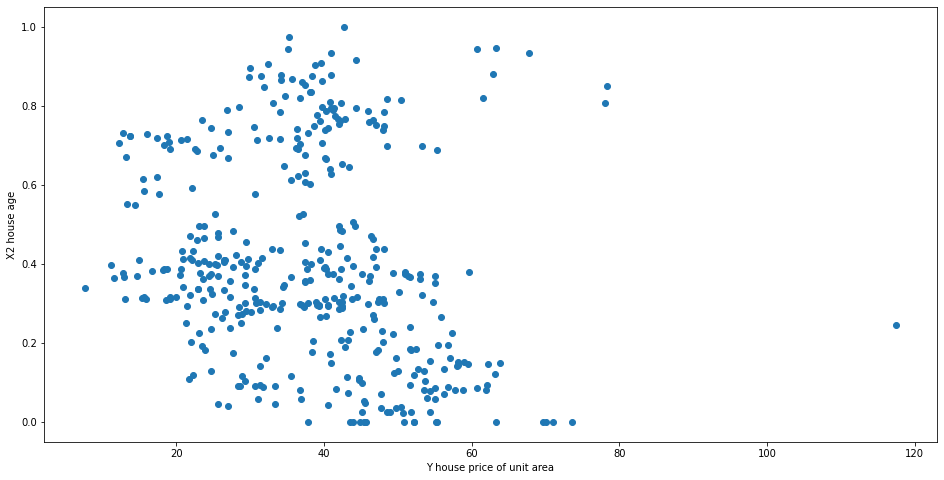

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Y house price of unit area'], df['X2 house age'])
ax.set_xlabel('Y house price of unit area')
ax.set_ylabel('X2 house age')
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

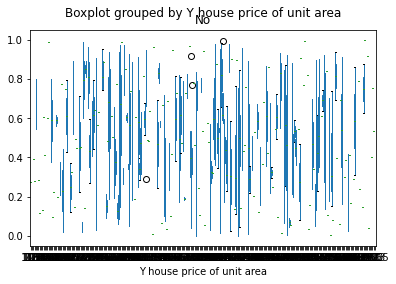

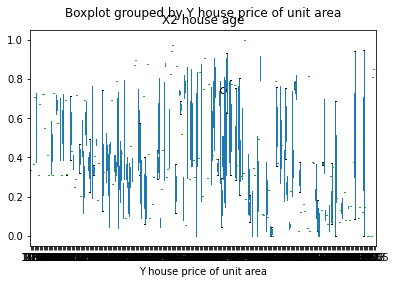

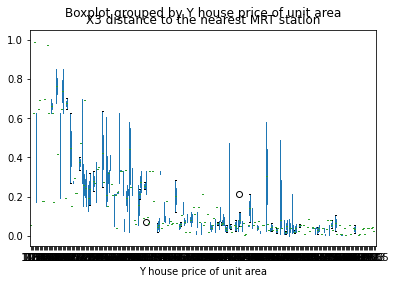

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Y house price of unit area",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Y house price of unit area', column =[i], grid = False)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

No                                         0.500000
X2 house age                               0.436644
X3 distance to the nearest MRT station     0.180204
Y house price of unit area                18.900000
dtype: float64


In [ ]:
print(df.shape)

(414, 4)


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(374, 4)


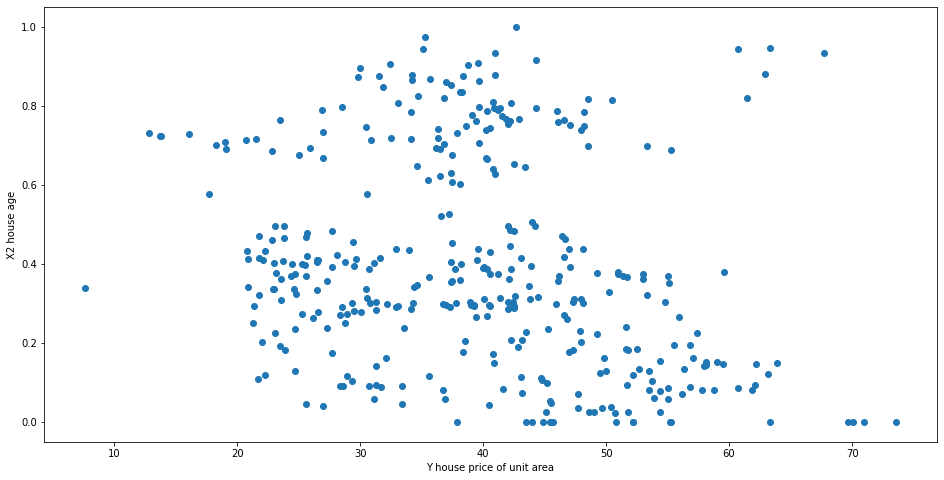

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Y house price of unit area'], df_out['X2 house age'])
ax.set_xlabel('Y house price of unit area')
ax.set_ylabel('X2 house age')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

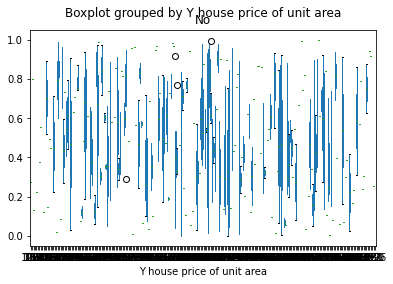

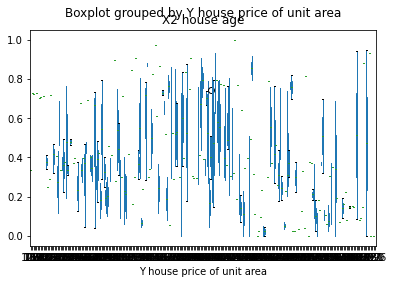

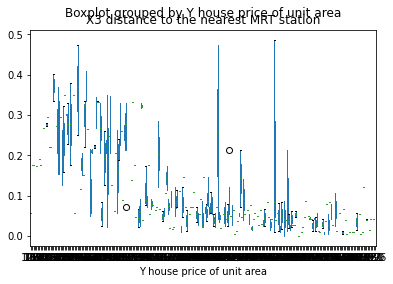

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Y house price of unit area",1)
y_fix = df_out["Y house price of unit area"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Y house price of unit area', column =[i], grid = False)

In [ ]:

X_fix = df_out.drop('Y house price of unit area',1)

In [ ]:
X_fix

,No,X2 house age,X3 distance to the nearest MRT station
0,0.000000,0.730594,0.009513
1,0.002421,0.445205,0.043809
2,0.004843,0.303653,0.083315
3,0.007264,0.303653,0.083315
4,0.009685,0.114155,0.056799
...,...,...,...
408,0.987893,0.422374,0.332944
410,0.992736,0.127854,0.010375
411,0.995157,0.429224,0.056861
412,0.997579,0.184932,0.012596


###Feature Importance

Feature selection


Dengan cara merangking fiturnya dengan cara tertentu (statisttik, jarak,dll) setelah diperoleh indikatornya yang sangat berpengaruh nilainya, kemudian fitur-fitur yang dianggap kurang dapat di pangkas dengan cara tertentu, atau dengan ambang batas 

keuntungannya :
lebih gampang menghitung ukuran yang dipakai untuk merangking. kebih mudah dan cepat 

kelemahan :

variable penting yang dihapus merupakan hal yang penting, ada juga variable yang tergantung dari variable" yang telah terpangkas 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=4)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Protein Name','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

* Correlation Matrix with Heatmap

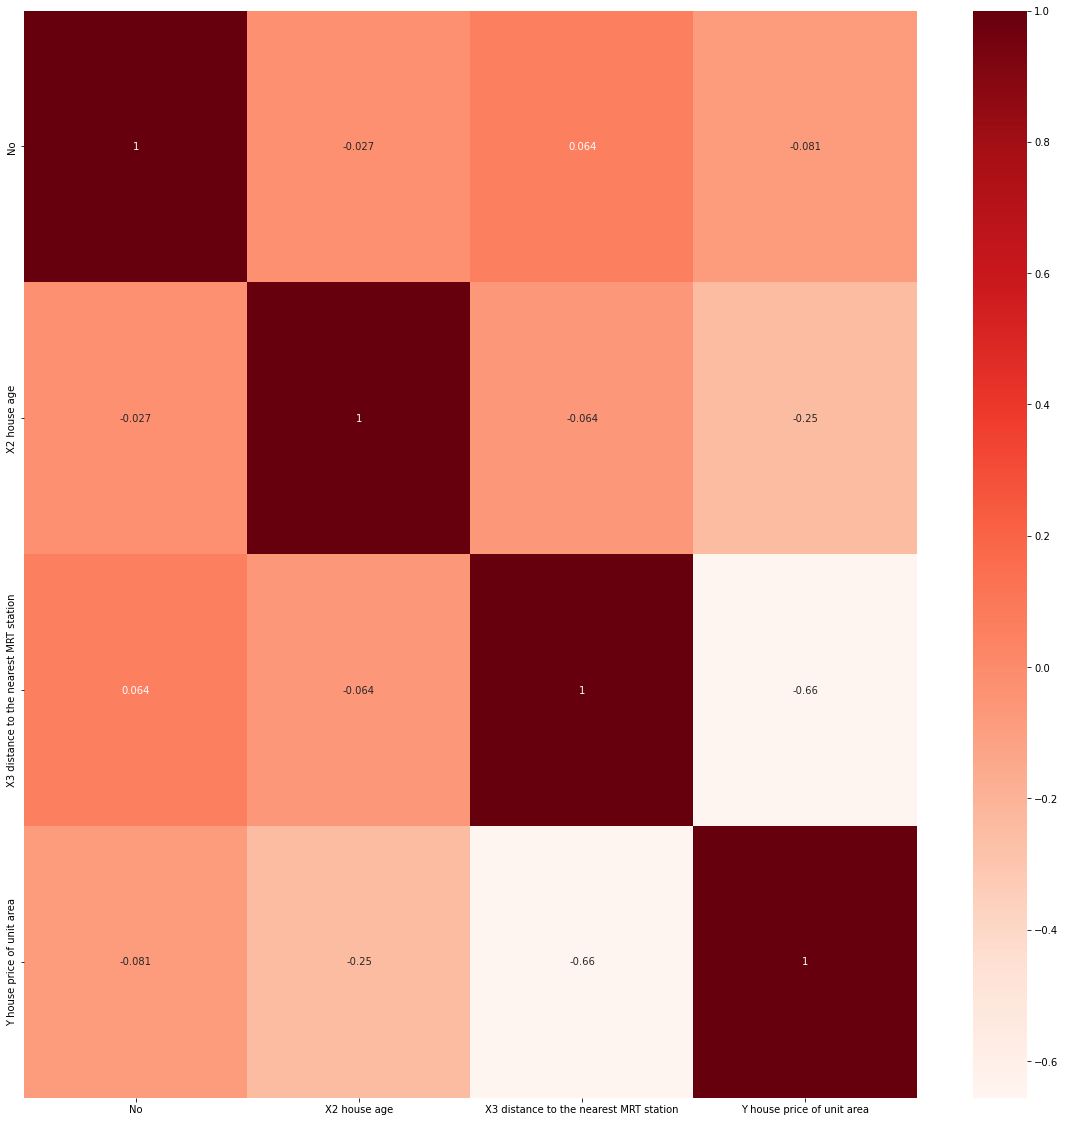

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="Reds")

## **Feature Extraction**

Metode dengan mentransformasi dari pasangan bilangan, dengan mengubah dimensi dengan cara ekstraksi (kombinasi linear, dll).

Membuat fitur baru dengan Mengkombinasikan future lama dengan dimensi yang lebih sedikit dibandingkan dengan sebelumnya. future ini untuk menghindari hilangnya informasi data 


In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 from matplotlib import offsetbox
 from sklearn import manifold, datasets, decomposition, discriminant_analysis

 digits = datasets.load_digits()

 X = digits.data
 y = digits.target

 n_samples, n_features = X.shape

* LDA


Import menggunakan discriminant analysis daei modul skaller. Kemudian Buat variable lda untuk tentukan parameter untuk komponennya dan menetukan batasnya.
Hasilnya akan di representasikan oleh data frame. Nilainya akan berbeda dengan nilai asli 


In [ ]:
 def embedding_plot(X, title):
     x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
     X = (X - x_min) / (x_max - x_min)
     plt.figure()
     ax = plt.subplot(aspect='equal')
     sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
     shown_images = np.array([[1., 1.]])
     for i in range(X.shape[0]):
         if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
         shown_images = np.r_[shown_images, [X[i]]]
         ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
     plt.xticks([]), plt.yticks([])
     plt.title(title)

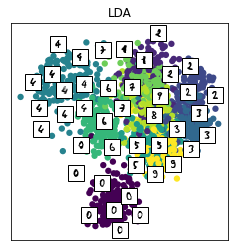

In [ ]:
 X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
 embedding_plot(X_lda, "LDA")
 plt.show()

In [ ]:
 X_lda

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])

In [ ]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

lda_df = pd.DataFrame(data = lda
             , columns = ['new_var1', 'new_var2'])
finalDf = pd.concat([lda_df, y_fix], axis = 1)
finalDf.head()

,new_var1,new_var2,Y house price of unit area
0,-2.014632,-5.623486,37.9
1,0.220967,3.592400,42.2
2,2.234855,2.709504,47.3
3,2.760965,-0.624427,54.8
4,-5.845449,1.754015,43.1


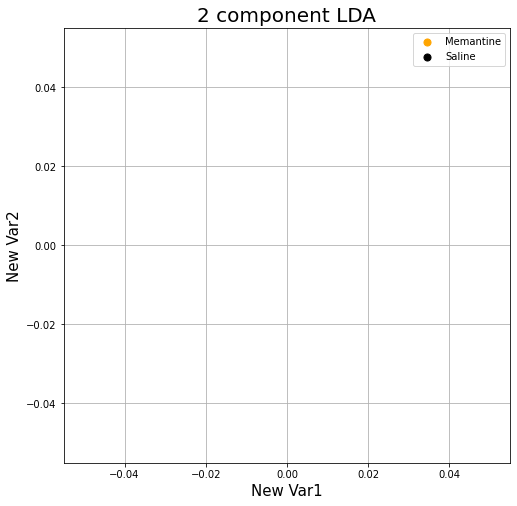

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['orange', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y house price of unit area'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'new_var1']
               , finalDf.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Memantine", "Saline"])
ax.grid()

* PCA

PCA bekerja untuk menghitung variance dari tiap atribut

Dibuatkan variable. dengan menggunkana metode yang berbeda 

In [ ]:
#first reduxe de dimensin
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fix)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_fix], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Y house price of unit area
0,0.552738,0.251825,37.9
1,0.504467,-0.030388,42.2
2,0.478611,-0.170748,47.3
3,0.476221,-0.170366,54.8
4,0.444919,-0.356367,43.1


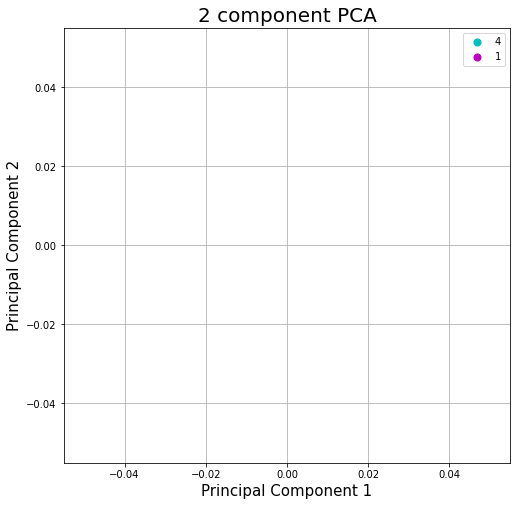

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0]
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y house price of unit area'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["4", "1"])
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:

X_2d = tsne.fit_transform(X_fix)

In [ ]:
print(X_2d)

[[-5.57628489e+00  2.37014027e+01]
 [ 1.52804222e+01  7.05533886e+00]
 [ 1.60635071e+01  4.82918978e+00]
 [ 1.56559668e+01  4.63910198e+00]
 [ 1.94050732e+01  4.98342842e-01]
 [ 1.41895714e+01  4.58382457e-01]
 [-5.88842773e+00  2.30310822e+01]
 [ 1.48493958e+01  7.37978506e+00]
 [ 1.34117928e+01  2.98948717e+00]
 [-6.42313623e+00  2.37518749e+01]
 [ 1.89520817e+01  9.92737174e-01]
 [ 1.57885399e+01  4.30861902e+00]
 [ 1.26870108e+01  2.98690343e+00]
 [ 1.48037519e+01  3.30024052e+00]
 [-6.52830887e+00  2.32956696e+01]
 [ 2.04147129e+01 -1.04769897e+00]
 [ 1.49296618e+01  6.45113659e+00]
 [ 1.51784773e+01  5.98205233e+00]
 [ 2.02040405e+01 -4.43316877e-01]
 [ 1.41576424e+01  1.57289654e-01]
 [ 1.68909264e+01  3.57925701e+00]
 [ 1.42419376e+01  3.03571057e+00]
 [ 1.72268200e+01  2.92372537e+00]
 [-7.79943132e+00  2.39365883e+01]
 [-4.51020336e+00  2.14614525e+01]
 [ 1.94380989e+01 -3.92236203e-01]
 [ 1.67620945e+01  3.11002684e+00]
 [ 1.41478567e+01  6.92874289e+00]
 [ 1.82052441e+01  8

In [ ]:
new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, y_fix], axis = 1)
tsne_df.head()

,feature 1,feature 2,Y house price of unit area
0,-5.576285,23.701403,37.9
1,15.280422,7.055339,42.2
2,16.063507,4.829190,47.3
3,15.655967,4.639102,54.8
4,19.405073,0.498343,43.1


* t-SNE


Menggunakan modul scaller, memvisualisasikan ke dua dimensi, perbedaannya tsne hanya emnggunakan variable x  yang akan Menghasilkan fitur baru  


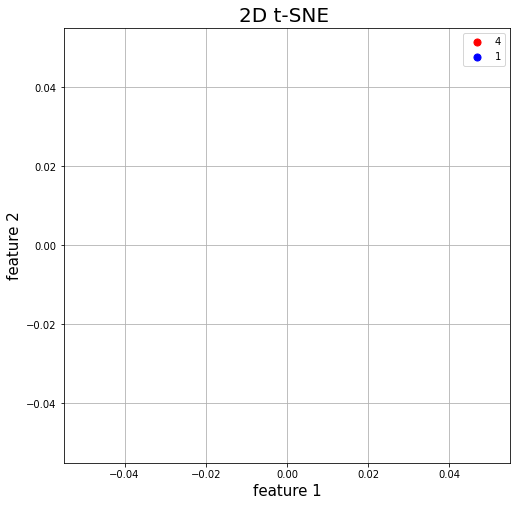

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [1.0,2.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['Y house price of unit area'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["4", "1"])
ax.grid()